In [31]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
import matplotlib.pyplot as plt

In [37]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [38]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

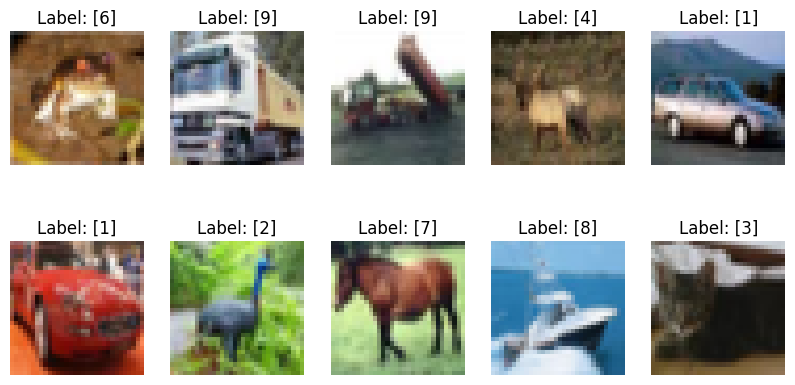

In [39]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

In [40]:
# Normalize the images to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

In [41]:
y_train_encoded.shape

(50000, 10)

In [42]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg_base.trainable = False
vgg_model = Sequential([
    vgg_base,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [54]:
vgg_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,915,552 (56.90 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 133,910 (523.09 KB)

In [43]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
vgg_history = vgg_model.fit(x_train, y_train_encoded, epochs=2, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/2
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 251s 178ms/step - accuracy: 0.4940 - loss: 1.4469 - val_accuracy: 0.5654 - val_loss: 1.2305
Epoch 2/2
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 210s 149ms/step - accuracy: 0.5338 - loss: 1.3424 - val_accuracy: 0.5880 - val_loss: 1.1881


In [48]:
vgg_loss, vgg_accuracy = vgg_model.evaluate(x_test, y_test_encoded, verbose=1)
print(f"VGG16 - Test Loss: {vgg_loss}, Test Accuracy: {vgg_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - accuracy: 0.5712 - loss: 1.2295
VGG16 - Test Loss: 1.2317754030227661, Test Accuracy: 0.5734000205993652


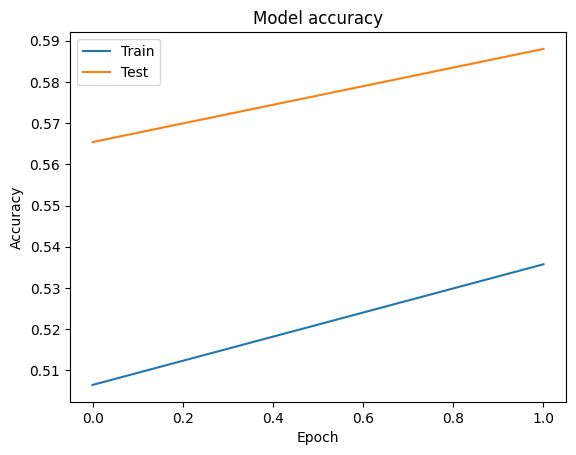

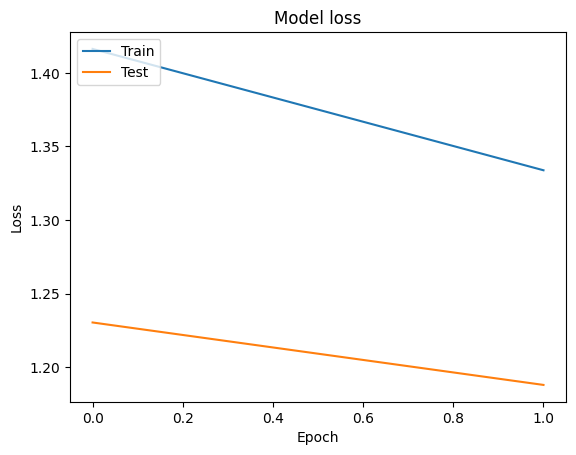

In [50]:
# Plot training & validation accuracy values
plt.plot(vgg_history.history['accuracy'])
plt.plot(vgg_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(vgg_history.history['loss'])
plt.plot(vgg_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 145ms/step


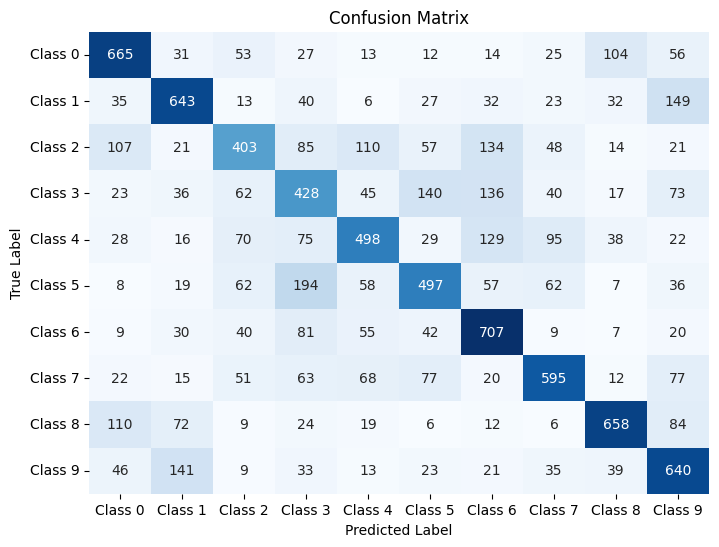

In [51]:
import numpy as np 
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(vgg_model.predict(x_test), axis=-1)
y_true = np.argmax(y_test_encoded, axis=-1)
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[f'Class {i}' for i in range(10)], 
            yticklabels=[f'Class {i}' for i in range(10)])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix")
plt.show()

In [52]:
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
resnet_base.trainable = False
resnet_model = Sequential([
    resnet_base,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [53]:
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_history = resnet_model.fit(x_train, y_train_encoded, epochs=2, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/2
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 198s 135ms/step - accuracy: 0.1013 - loss: 2.3517 - val_accuracy: 0.0976 - val_loss: 2.3026
Epoch 2/2
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 213s 151ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.0950 - val_loss: 2.3031


In [55]:
resnet_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,378,400 (93.00 MB)

 Trainable params: 263,562 (1.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 527,126 (2.01 MB)

In [56]:
resnet_loss, resnet_accuracy = resnet_model.evaluate(x_test, y_test_encoded, verbose=1)
print(f"ResNet50 - Test Loss: {resnet_loss}, Test Accuracy: {resnet_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 129ms/step - accuracy: 0.0987 - loss: 2.3028
ResNet50 - Test Loss: 2.30275559425354, Test Accuracy: 0.10000000149011612


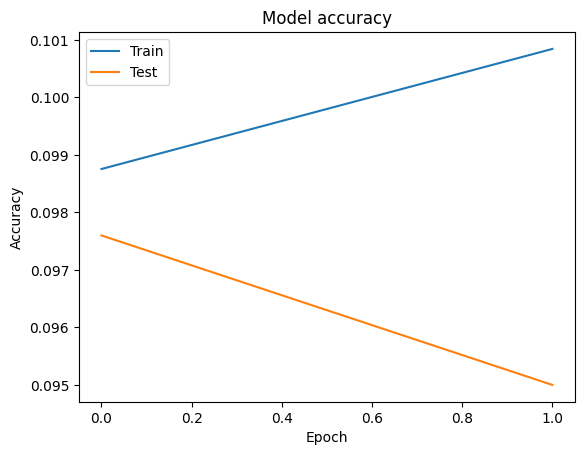

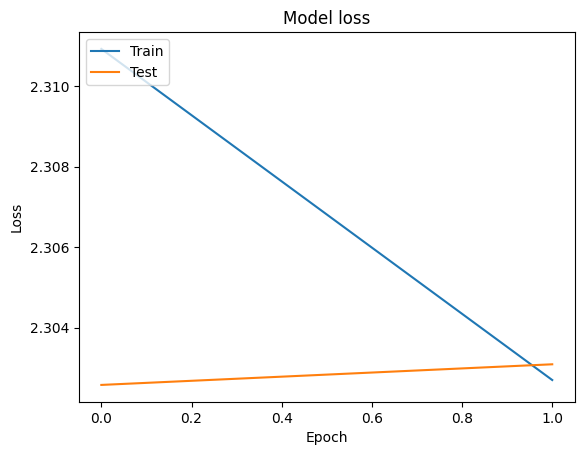

In [57]:
# Plot training & validation accuracy values
plt.plot(resnet_history.history['accuracy'])
plt.plot(resnet_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 120ms/step


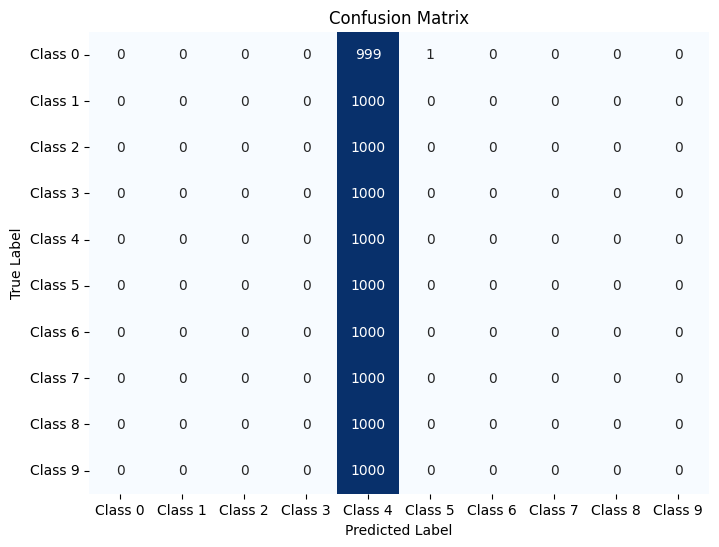

In [58]:
import numpy as np 
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(resnet_model.predict(x_test), axis=-1)
y_true = np.argmax(y_test_encoded, axis=-1)
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[f'Class {i}' for i in range(10)], 
            yticklabels=[f'Class {i}' for i in range(10)])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix")
plt.show()